<a href="https://colab.research.google.com/github/bkansal/Simple_QRcode/blob/main/Simple_QR_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#!pip3 install qrcode
#!pip install Pillow
#!pip install image

## **Define Error correction levels to Create QR code by applying Reed-Solomon Encoding**

In [57]:
def multiply_polynomials(poly1, poly2):
    """
    Multiply two polynomials.
    """
    result = [0] * (len(poly1) + len(poly2) - 1)
    for i in range(len(poly1)):
        for j in range(len(poly2)):
            result[i + j] ^= poly1[i] * poly2[j]
    return result

def add_error_correction(original_data, error_correction):
    block_size = len(original_data)
    #print(original_data)
        # Define the size of the error correction block based on the error correction level
    if error_correction == 'L':
        ec_block_size = 2
    elif error_correction == 'M':
        ec_block_size = 4
    elif error_correction == 'Q':
        ec_block_size = 6
    elif error_correction == 'H':
        ec_block_size = 8
    else:
        raise ValueError("Invalid error correction level")

    # Calculate the total block size including error correction
    total_block_size = block_size + ec_block_size
    #print(list(original_data))

    # Initialize the coefficients for the original data polynomial
    original_coefficients = list(original_data) + [0] * ec_block_size

    # Initialize the coefficients for the Reed-Solomon code polynomial
    rs_coefficients = [1] * ec_block_size

     # Generate Reed-Solomon code coefficients using the original data coefficients
    for i in range(ec_block_size):
        rs_coefficients = multiply_polynomials(rs_coefficients, [1, pow(2, i)])  # 0x11b is the field generator polynomial

    # Create the final encoded data by appending the Reed-Solomon code coefficients
    encoded_data = original_data + rs_coefficients
   #encoded_data = bytes((a^b) for a, b in zip(original_coefficients, rs_coefficients))
    return encoded_data

In [58]:
import qrcode
import image
qr = qrcode.QRCode(version=2,
    box_size=5,
    border=2)


In [59]:
data = "https://www.linkedin.com/in/bhumika-kansal-aa6717101"
qr.add_data(data)
#print(len(qr.get_matrix()))
add_error_correction(qr.get_matrix(), error_correction='L')
qr.make(fit =True)
img = qr.make_image(fill = 'Black',back_color = 'White')

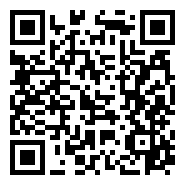

In [60]:
img.save("Image.png")
from IPython.display import display, Image
display(Image(filename='Image.png'))

## **Create Gaussian random texture**

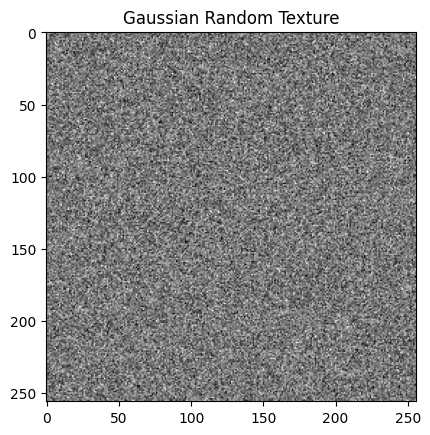

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate Gaussian random texture
def generate_gaussian_random_texture(image_size, mean, std_dev):
    # Create a random image with Gaussian distribution
    gaussian_random_texture = np.random.normal(mean, std_dev, size=image_size)

    # Clip pixel values to the valid range (e.g., 0 to 255 for images)
    gaussian_random_texture = np.clip(gaussian_random_texture, 0, 255)

    # Round and convert to integer values
    gaussian_random_texture = np.round(gaussian_random_texture).astype(np.uint8)

    return gaussian_random_texture

# Example usage
image_size = (256, 256)  # Adjust the size of the image as needed
#image_size = 256
mean_value = 120         # Adjust the mean value as needed
std_deviation = 40      # Adjust the standard deviation as needed

# Generate Gaussian random texture
gaussian_texture = generate_gaussian_random_texture(image_size, mean_value, std_deviation)

# Display the generated texture
plt.imshow(gaussian_texture, cmap='gray', vmin=0, vmax=255)
#plt.plot(gaussian_texture)
#plt.hist(gaussian_texture,30,density=True)
plt.title('Gaussian Random Texture')
plt.show()

In [63]:
gaussian_texture.shape
gaussian_texture[1,1]

212

## **Create bilinear interpolation texture**

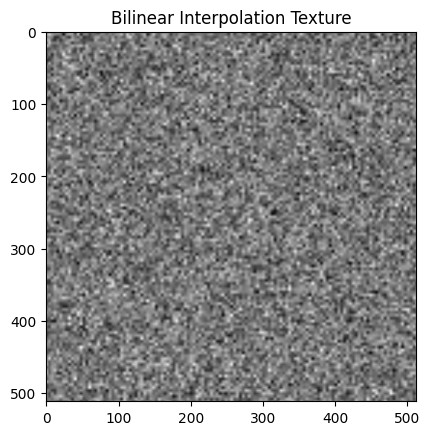

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate 2D bilinear interpolation texture
def generate_bilinear_interpolation_texture(gaussian_texture, scale_factor):
    # Get the original image size
    original_size = gaussian_texture.shape

    # Create a resized grid
    new_rows = int(original_size[0] * scale_factor)
    new_cols = int(original_size[1] * scale_factor)

    # Create coordinates for the resized image
    x, y = np.meshgrid(np.linspace(0, original_size[1] - 1, new_cols),
                       np.linspace(0, original_size[0] - 1, new_rows))

    # Calculate coordinates in the original image
    x_original = x / scale_factor
    y_original = y / scale_factor

    # Perform bilinear interpolation
    x0 = np.floor(x_original).astype(int)
    x1 = x0 + 1
    y0 = np.floor(y_original).astype(int)
    y1 = y0 + 1

    x0 = np.clip(x0, 0, original_size[1] - 1)
    x1 = np.clip(x1, 0, original_size[1] - 1)
    y0 = np.clip(y0, 0, original_size[0] - 1)
    y1 = np.clip(y1, 0, original_size[0] - 1)

    Ia = gaussian_texture[y0, x0]
    Ib = gaussian_texture[y1, x0]
    Ic = gaussian_texture[y0, x1]
    Id = gaussian_texture[y1, x1]

    # Bilinear interpolation formula
    wa = (x1 - x_original) * (y1 - y_original)
    wb = (x1 - x_original) * (y_original - y0)
    wc = (x_original - x0) * (y1 - y_original)
    wd = (x_original - x0) * (y_original - y0)

    interpolated_texture = wa * Ia + wb * Ib + wc * Ic + wd * Id

    return interpolated_texture.astype(np.uint8)

# Example usage
#image_size = (256, 256)
#mean_value = 128
#std_deviation = 20

# Generate Gaussian random texture
#gaussian_texture = generate_gaussian_random_texture(image_size, mean_value, std_deviation)

# Display the original texture
#plt.imshow(gaussian_texture, cmap='gray', vmin=0, vmax=255)
#plt.title('Original Gaussian Texture')
#plt.show()

# Generate and display the bilinear interpolation texture
scale_factor = 2.0
interpolated_texture = generate_bilinear_interpolation_texture(gaussian_texture, scale_factor)
plt.imshow(interpolated_texture, cmap='gray', vmin=0, vmax=255)
plt.title('Bilinear Interpolation Texture')
plt.show()


In [65]:
original_size = gaussian_texture.shape

# Create a resized grid
new_rows = int(original_size[0] * scale_factor)
new_cols = int(original_size[1] * scale_factor)

# Create coordinates for the resized image
x, y = np.meshgrid(np.linspace(0, original_size[1] - 1, new_cols),
                       np.linspace(0, original_size[0] - 1, new_rows))

# Calculate coordinates in the original image
#x_original = x / scale_factor
#y_original = y / scale_facto
new_cols

512

## **Create halftone texture**

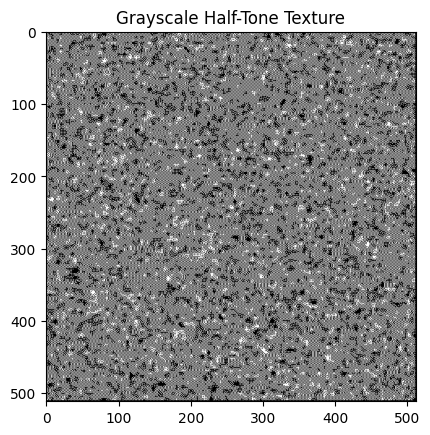

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate grayscale half-tone texture with bilinear interpolation
def generate_half_tone_texture(image, scale_factor, threshold):
    height, width = image.shape
    output_image = np.zeros_like(image, dtype=np.uint8)
    error_matrix = np.zeros_like(image, dtype=np.float32)
    error_matrix
    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = image[y, x]
            new_pixel = 255 if old_pixel + error_matrix[y, x] > threshold else 0
            output_image[y, x] = new_pixel

            quantization_error = old_pixel - new_pixel
            error_matrix[y, x + 1] += quantization_error * 7 / 16
            error_matrix[y + 1, x - 1] += quantization_error * 3 / 16
            error_matrix[y + 1, x] += quantization_error * 5 / 16
            error_matrix[y + 1, x + 1] += quantization_error * 1 / 16

    return output_image
#    half_tone_texture = np.where(interpolated_texture < threshold, 0, 255)

#    return half_tone_texture.astype(np.uint8)


# Display the original texture
#plt.imshow(gaussian_texture, cmap='gray', vmin=0, vmax=255)
#plt.title('Original Gaussian Texture')
#plt.show()

# Generate and display the half-tone texture
scale_factor = 1.0
half_tone_texture = generate_half_tone_texture(interpolated_texture, scale_factor, threshold=128)
plt.imshow(half_tone_texture, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Half-Tone Texture')
plt.show()


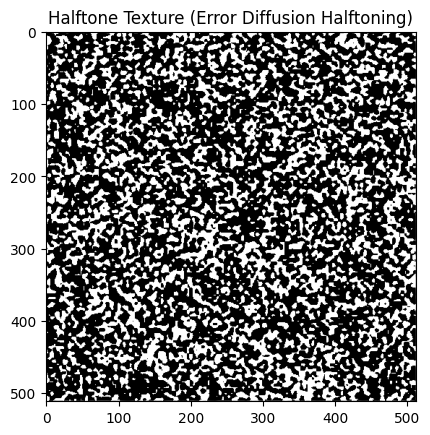

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def error_diffusion_halftoning(image):
    height, width = image.shape
    output_image = np.zeros_like(image, dtype=np.uint8)

    for y in range(height - 1):
        for x in range(1, width - 1):
            old_pixel = output_image[y, x]
            new_pixel = 255 if (image[y, x]) > 128 else 0
            output_image[y, x] = new_pixel

            quantization_error = (old_pixel - new_pixel)
            output_image[y, x + 1] += quantization_error * 7 / 16
            output_image[y + 1, x - 1] += quantization_error * 3 / 16
            output_image[y + 1, x] += quantization_error * 5 / 16
            output_image[y + 1, x + 1] += quantization_error * 1 / 16

    return output_image


# Apply error diffusion halftoning and display the result
halftone_result = error_diffusion_halftoning(interpolated_texture)
plt.imshow(halftone_result, cmap='gray', vmin=0, vmax=255)
plt.title('Halftone Texture (Error Diffusion Halftoning)')
plt.show()


## **Create basic QR code using segno lib**

In [ ]:
import segno

qrcode=segno.make_qr("www.linkedin.com/in/bhumika-kansal-aa6717101")

In [ ]:
qrcode.save("basic_qrcode.png",scale=5, border=0)

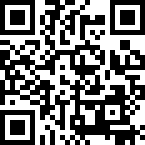

In [ ]:
from IPython import display
display.Image("basic_qrcode.png")

## **To Create animated QR code**

In [ ]:
def show_gif(fname):
    import base64
    from IPython import display
    with open(fname, 'rb') as fd:
        b64 = base64.b64encode(fd.read()).decode('ascii')
    return display.HTML(f'<img src="data:image/gif;base64,{b64}" />')

In [ ]:
import segno
from urllib.request import urlopen

slts_qrcode = segno.make_qr("www.linkedin.com/in/bhumika-kansal-aa6717101")
nirvana_url = urlopen("https://media.giphy.com/media/LpwBqCorPvZC0/giphy.gif")
#slts_qrcode.to_artistic(
#    background=nirvana_url,
#    target="animated_qrcode.gif",
#    scale=5,
#)
#slts_qrcode.save("animated_qrcode.gif",scale=5, border=0)
#show_gif("animated_qrcode.gif")